In [1]:
import pandas as pd

# لود فایل اصلی بازیکنان
df_players = pd.read_csv('dataset/all_players_stats.csv')

# فیلتر بازیکنان منچستر سیتی
df_mancity = df_players[df_players['Team'] == 'Manchester City']

# نمایش ستون‌های مهم (اصلاح شده)
print("✅ بازیکنان منچستر سیتی:")
print(df_mancity[['Player', 'Position', 'Apearances', 'Goals', 'Penalties']].head())

# ذخیره در فایل جدید
df_mancity.to_csv('dataset/manchester_city_player_stats.csv', index=False)


✅ بازیکنان منچستر سیتی:
              Player            Position  Apearances  Goals  Penalties
347       Nathan Aké            Defender          19      3          0
348   Bernardo Silva  Midfielder/Forward          46     13          0
349     Finley Burns            Defender           1      0          0
350     Scott Carson          Goalkeeper           0      0          0
351  Kevin De Bruyne  Midfielder/Forward          39     19          1


In [2]:
# خلاصه آماری ستون‌های عددی
print("📊 خلاصه آماری ستون‌های عددی:")
print(df_mancity[['Apearances', 'Goals', 'Penalties']].describe())


📊 خلاصه آماری ستون‌های عددی:
       Apearances      Goals  Penalties
count   33.000000  33.000000  33.000000
mean    19.333333   4.424242   0.333333
std     17.912403   6.528927   1.266557
min      0.000000   0.000000   0.000000
25%      1.000000   0.000000   0.000000
50%     18.000000   2.000000   0.000000
75%     32.000000   6.000000   0.000000
max     51.000000  24.000000   7.000000


<div style = "direction : rtl;">

🎯 ستون Apearances:
میانگین حضور بازیکن‌ها حدود ۱۹ بازی هست.

حداکثر حضور ۵۱ بازی و حداقل هم ۰.

چارک اول (Q1) برابر با ۱ هست → یعنی ۲۵٪ بازیکنان فقط ۱ بار یا کمتر بازی کردن → احتمالاً بازیکنان ذخیره یا جوان هستند.

⚽️ ستون Goals:
میانگین گل ۴.۴ هست، اما انحراف معیار نسبتاً بالاست (۶.۵) → یعنی تنوع زیادی در تعداد گل وجود داره.

ماکسیمم گل زده شده ۲۴ تا هست، که نشون می‌ده یکی از بازیکنان گلزن اصلی تیمه.

🎯 ستون Penalties:
اکثراً ۰ پنالتی زدن → چون میانه (50٪) و چارک سوم (75٪) هر دو صفر هستن.

حداکثر پنالتی زده شده ۷ عدد هست.

میانگین گل‌ها: از mean = 4.424242 → گفتم به طور متوسط هر بازیکن حدود ۴.۴ گل زده.

انحراف معیار گل‌ها: از std = 6.528927 → گفتم تنوع زیادی داریم چون std بزرگه نسبت به میانگین.

چارک اول گل‌ها: از 25% = 0.0 → یعنی ۲۵٪ بازیکنان اصلاً گل نزدن.

ماکزیمم گل‌ها: از max = 24.0 → یعنی بیشترین گل زده شده توسط یک بازیکن ۲۴ تا بوده.

</div>

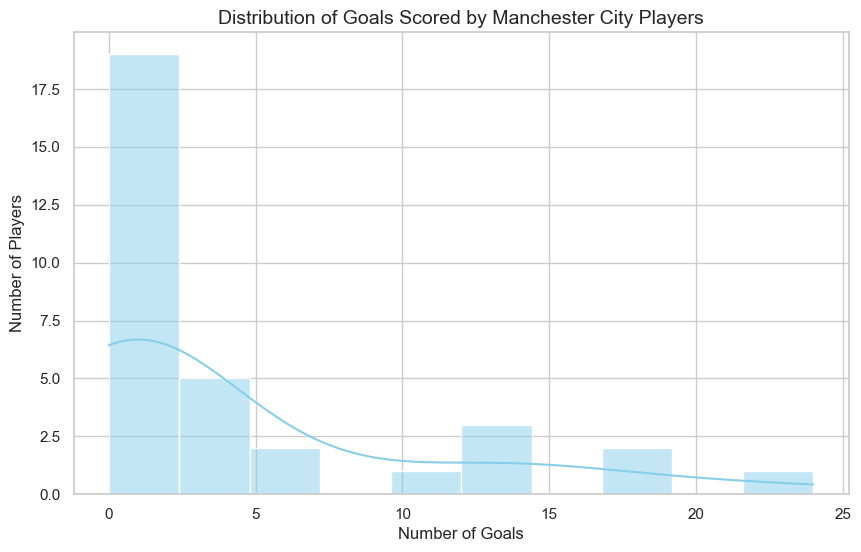

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیم استایل برای زیبایی بیشتر
sns.set(style="whitegrid")

# رسم هیستوگرام تعداد گل‌ها
plt.figure(figsize=(10, 6))
sns.histplot(data=df_mancity, x='Goals', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Goals Scored by Manchester City Players', fontsize=14)
plt.xlabel('Number of Goals')
plt.ylabel('Number of Players')
plt.show()


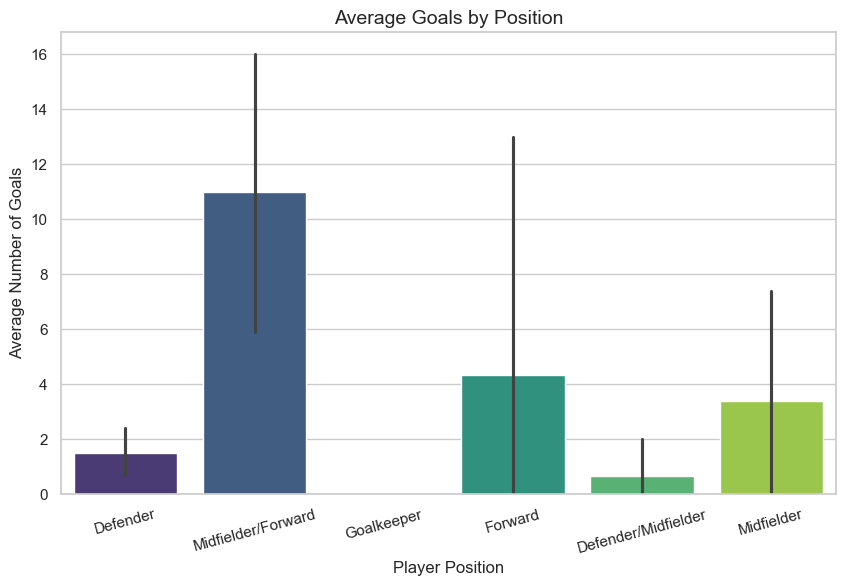

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_mancity, x='Position', y='Goals', hue='Position', palette='viridis', estimator='mean', legend=False)
plt.title('Average Goals by Position', fontsize=14)
plt.xlabel('Player Position')
plt.ylabel('Average Number of Goals')
plt.xticks(rotation=15)
plt.show()


In [5]:
import pandas as pd

# Load the Manchester City players data
df_mancity = pd.read_csv('dataset/manchester_city_player_stats.csv')

# Show first 5 rows to inspect data
print("First 5 rows of the data:")
print(df_mancity.head())

# Check for missing values in each column
print("\nMissing values per column:")
print(df_mancity.isnull().sum())

# Show data types of each column
print("\nData types of each column:")
print(df_mancity.dtypes)

# Get descriptive statistics of numerical columns
print("\nDescriptive statistics of numerical columns:")
print(df_mancity.describe())


First 5 rows of the data:
              Team  JerseyNo           Player            Position  Apearances  \
0  Manchester City         6       Nathan Aké            Defender          19   
1  Manchester City        20   Bernardo Silva  Midfielder/Forward          46   
2  Manchester City        94     Finley Burns            Defender           1   
3  Manchester City        33     Scott Carson          Goalkeeper           0   
4  Manchester City        17  Kevin De Bruyne  Midfielder/Forward          39   

   Substitutions  Goals  Penalties  YellowCards  RedCards  
0              8      3          0          2.0       0.0  
1              4     13          0          6.0       0.0  
2              0      0          0          0.0       0.0  
3              1      0          0          0.0       0.0  
4              6     19          1          4.0       0.0  

Missing values per column:
Team             0
JerseyNo         0
Player           0
Position         0
Apearances       0
Subs

✅ Updated DataFrame with encoded Position and new feature:
            Player            Position  Position_Encoded  Goals  Apearances  \
0       Nathan Aké            Defender                 0      3          19   
1   Bernardo Silva  Midfielder/Forward                 5     13          46   
2     Finley Burns            Defender                 0      0           1   
3     Scott Carson          Goalkeeper                 3      0           0   
4  Kevin De Bruyne  Midfielder/Forward                 5     19          39   

   Goals_per_Appearance  
0              0.157895  
1              0.282609  
2              0.000000  
3              0.000000  
4              0.487179  


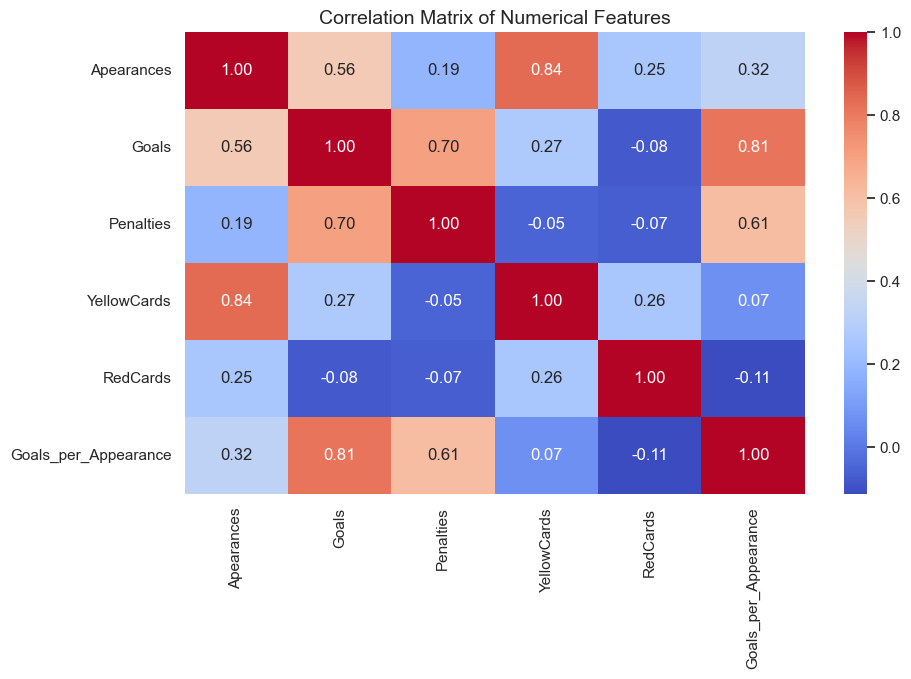

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the Manchester City players data
df_mancity = pd.read_csv('dataset/manchester_city_player_stats.csv')

# Step 1: Handle missing values
# Fill missing numerical values with 0 (assuming missing means no activity)
df_mancity.fillna({'Apearances': 0, 'Substitutions': 0, 'Goals': 0, 'Penalties': 0, 'YellowCards': 0, 'RedCards': 0}, inplace=True)

# Step 2: Encode categorical variables (Position)
label_encoder = LabelEncoder()
df_mancity['Position_Encoded'] = label_encoder.fit_transform(df_mancity['Position'])

# Step 3: Create a new feature (Goals per Appearance)
df_mancity['Goals_per_Appearance'] = df_mancity['Goals'] / df_mancity['Apearances'].replace(0, 1)  # Avoid division by zero

# Step 4: Display the updated dataframe
print("✅ Updated DataFrame with encoded Position and new feature:")
print(df_mancity[['Player', 'Position', 'Position_Encoded', 'Goals', 'Apearances', 'Goals_per_Appearance']].head())

# Step 5: Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_mancity[['Apearances', 'Goals', 'Penalties', 'YellowCards', 'RedCards', 'Goals_per_Appearance']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

In [7]:
import pandas as pd

# Load match results
df_matches = pd.read_csv('dataset/all_match_results.csv')   

# Standardize team name to match exactly
df_matches['HomeTeam'] = df_matches['HomeTeam'].str.strip()
df_matches['AwayTeam'] = df_matches['AwayTeam'].str.strip()

# Filter matches involving Manchester City
df_mc_matches = df_matches[
    (df_matches['HomeTeam'] == 'Manchester City') |
    (df_matches['AwayTeam'] == 'Manchester City')
].copy()

# Convert date to datetime format
df_mc_matches['Date'] = pd.to_datetime(df_mc_matches['Date'], format='%d-%b-%Y')

# Sort by date
df_mc_matches.sort_values('Date', inplace=True)

# نمایش چند سطر اول
print(df_mc_matches.head())



         Date           HomeTeam Result         AwayTeam
9  2021-08-15  Tottenham Hotspur    1:0  Manchester City
15 2021-08-21    Manchester City    5:0     Norwich City
23 2021-08-28    Manchester City    5:0          Arsenal
34 2021-09-11     Leicester City    0:1  Manchester City
44 2021-09-18    Manchester City    0:0      Southampton


In [8]:
import pandas as pd

# فرض کن دیتافریم اصلی بازی‌هاست
df_matches = pd.read_csv('dataset/all_match_results.csv')  # یا هر فایل خودت

# تبدیل ستون Date به datetime و استخراج year و month
df_matches['Date'] = pd.to_datetime(df_matches['Date'])
df_matches['year'] = df_matches['Date'].dt.year
df_matches['month'] = df_matches['Date'].dt.month

# فیلتر بازی‌های منچستر سیتی (خانگی یا مهمان)
df_mc_matches = df_matches[(df_matches['HomeTeam'] == 'Manchester City') | (df_matches['AwayTeam'] == 'Manchester City')].copy()

# ذخیره به فایل جدید csv
df_mc_matches.to_csv('dataset/manchester_city_matches.csv', index=False)

# نمایش چند ردیف اول
print(df_mc_matches.head())


         Date           HomeTeam Result         AwayTeam  year  month
9  2021-08-15  Tottenham Hotspur    1:0  Manchester City  2021      8
15 2021-08-21    Manchester City    5:0     Norwich City  2021      8
23 2021-08-28    Manchester City    5:0          Arsenal  2021      8
34 2021-09-11     Leicester City    0:1  Manchester City  2021      9
44 2021-09-18    Manchester City    0:0      Southampton  2021      9


In [9]:
import pandas as pd

# بارگذاری دیتاست آب‌وهوا
weather_df = pd.read_csv('dataset/MET Office Weather Data.csv')

# نمایش ستون‌ها و 5 سطر اول برای بررسی اولیه
print("ستون‌ها:")
print(weather_df.columns)
print("\n۵ سطر اول:")
print(weather_df.head())

# نمایش مقادیر یکتای ستون ایستگاه (station)
print("\nایستگاه‌های موجود در ستون 'station':")
print(weather_df['station'].unique())

# فیلتر کردن داده‌های مربوط به منچستر یا ringway
manchester_weather_df = weather_df[
    weather_df['station'].str.contains('manchester|ringway', case=False, na=False)
].copy()

# نمایش چند سطر اول از داده‌های منچستر
print("\n۵ سطر اول از داده‌های منچستر یا Ringway:")
print(manchester_weather_df.head())


ستون‌ها:
Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'station'], dtype='object')

۵ سطر اول:
     year  month  tmax  tmin  af  rain  sun    station
0  1941.0    1.0   NaN   NaN NaN  74.7  NaN  aberporth
1  1941.0    2.0   NaN   NaN NaN  69.1  NaN  aberporth
2  1941.0    3.0   NaN   NaN NaN  76.2  NaN  aberporth
3  1941.0    4.0   NaN   NaN NaN  33.7  NaN  aberporth
4  1941.0    5.0   NaN   NaN NaN  51.3  NaN  aberporth

ایستگاه‌های موجود در ستون 'station':
['aberporth' 'armagh' 'ballypatrick' 'bradford' 'braemar' 'camborne'
 'cambridge' 'cardiff' 'chivenor' 'cwmystwyth' 'dunstaffnage' 'durham'
 'eastbourne' 'eskdalemuir' 'heathrow' 'hurn' 'lerwick' 'leuchars'
 'lowestoft' 'manston' 'nairn' 'newtonrigg' 'oxford' 'paisley' 'ringway'
 'rossonwye' 'shawbury' 'sheffield' 'southampton' 'stornoway' 'tiree'
 'valley' 'waddington' 'whitby' 'wickairport' 'yeovilton']

۵ سطر اول از داده‌های منچستر یا Ringway:
         year  month  tmax  tmin  af  rain    sun  station
23485  1946.

In [10]:
close_stations = ['shawbury', 'bradford', 'sheffield']
recent_weather = weather_df[weather_df['year'].isin([2019, 2020])]
valid_stations = recent_weather[recent_weather['station'].isin(close_stations)]['station'].unique()

print("ایستگاه‌های نزدیک با دیتای ۲۰۱۹ و ۲۰۲۰:", valid_stations)


ایستگاه‌های نزدیک با دیتای ۲۰۱۹ و ۲۰۲۰: ['bradford' 'shawbury' 'sheffield']


In [11]:
# فیلتر کردن داده‌ها
filtered_weather = weather_df[
    (weather_df['year'].isin([2019, 2020])) &
    (weather_df['station'].isin(['bradford', 'shawbury', 'sheffield']))
].copy()

# فقط ستون‌های عددی (year, month, tmax, tmin, af, rain, sun)
numeric_cols = ['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun']

# میانگین‌گیری برای هر سال و ماه
monthly_avg_weather = filtered_weather[numeric_cols].groupby(['year', 'month']).mean().reset_index()

print(monthly_avg_weather.head())


     year  month       tmax      tmin         af        rain     sun
0  2019.0    1.0   6.533333  1.766667  10.333333   28.400000   36.30
1  2019.0    2.0  11.200000  2.400000   6.333333   32.000000  113.40
2  2019.0    3.0  11.233333  4.133333   1.666667  100.066667  121.25
3  2019.0    4.0  13.833333  4.100000   3.666667   26.400000  144.50
4  2019.0    5.0  15.766667  6.900000   0.333333   38.333333  176.60


In [12]:
# فرض کنیم داده‌های آب و هوا فقط برای ۲۰۱۸ و ۲۰۱۹ داریم
available_years = monthly_avg_weather['year'].unique()

# تعریف year_for_weather با یک سال عقب تر
df_mc_matches['year_for_weather'] = df_mc_matches['year'] - 1

# اگر year_for_weather توی داده‌های آب و هوا نیست، اون رو به نزدیک‌ترین سال موجود تغییر میدیم
df_mc_matches['year_for_weather'] = df_mc_matches['year_for_weather'].apply(
    lambda y: max(y for y in available_years if y <= y)
)

# اطمینان از نوع صحیح ستون‌ها برای merge
df_mc_matches['year_for_weather'] = df_mc_matches['year_for_weather'].astype(int)
df_mc_matches['month'] = df_mc_matches['month'].astype(int)
monthly_avg_weather['year'] = monthly_avg_weather['year'].astype(int)
monthly_avg_weather['month'] = monthly_avg_weather['month'].astype(int)

# مرج کردن دیتا
merged_df = df_mc_matches.merge(monthly_avg_weather, left_on=['year_for_weather', 'month'], right_on=['year', 'month'], how='left')

In [13]:
df_weather = pd.read_csv("dataset/MET Office Weather Data.csv")


In [14]:
print(df_weather.shape)
print(df_weather.head())


(37049, 8)
     year  month  tmax  tmin  af  rain  sun    station
0  1941.0    1.0   NaN   NaN NaN  74.7  NaN  aberporth
1  1941.0    2.0   NaN   NaN NaN  69.1  NaN  aberporth
2  1941.0    3.0   NaN   NaN NaN  76.2  NaN  aberporth
3  1941.0    4.0   NaN   NaN NaN  33.7  NaN  aberporth
4  1941.0    5.0   NaN   NaN NaN  51.3  NaN  aberporth


In [15]:
import pandas as pd

# ایستگاه‌های انتخاب‌شده
stations_of_interest = ['bradford', 'shawbury', 'sheffield']

# فیلتر فقط سال‌های ۲۰۱۹ و ۲۰۲۰
filtered_weather = weather_df[
    (weather_df['year'].isin([2019, 2020])) &
    (weather_df['station'].isin(stations_of_interest))
].copy()

# میانگین‌گیری ماهانه
monthly_avg_weather = (
    filtered_weather
    .groupby(['year', 'month'], as_index=False)
    .mean(numeric_only=True)
)

# افزودن ستون station به عنوان "avg_manchester"
monthly_avg_weather['station'] = 'avg_manchester'

# افزودن به دیتافریم اصلی
weather_df = pd.concat([weather_df, monthly_avg_weather], ignore_index=True)
weather_df

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.700000,NaN,aberporth
1,1941.0,2.0,NaN,NaN,NaN,69.100000,NaN,aberporth
2,1941.0,3.0,NaN,NaN,NaN,76.200000,NaN,aberporth
3,1941.0,4.0,NaN,NaN,NaN,33.700000,NaN,aberporth
4,1941.0,5.0,NaN,NaN,NaN,51.300000,NaN,aberporth
...,...,...,...,...,...,...,...,...
37062,2020.0,2.0,9.033333,2.733333,2.000000,203.533333,72.50,avg_manchester
37063,2020.0,3.0,10.500000,2.266667,6.333333,47.133333,139.25,avg_manchester
37064,2020.0,4.0,15.466667,5.033333,1.666667,16.400000,211.70,avg_manchester
37065,2020.0,5.0,18.300000,7.000000,1.500000,6.900000,257.50,avg_manchester


In [16]:
import pandas as pd

# فرض بر این‌که weather_df شامل avg_manchester است:
# ['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'station']

# 1. فیلتر روی avg_manchester
avg_weather = weather_df[weather_df['station'] == 'avg_manchester'].copy()

# 2. میانگین‌گیری فقط بر اساس ماه (بدون سال)
monthly_weather = (
    avg_weather
    .groupby('month', as_index=False)
    .agg({
        'tmax': 'mean',
        'tmin': 'mean',
        'af':  'mean',
        'rain':'mean',
        'sun': 'mean'
    })
)

# 3. نمایش DataFrame نهایی هواشناسی بر اساس ماه
print(monthly_weather)


    month       tmax       tmin        af        rain      sun
0     1.0   7.800000   2.800000  6.500000   41.066667   43.750
1     2.0  10.116667   2.566667  4.166667  117.766667   92.950
2     3.0  10.866667   3.200000  4.000000   73.600000  130.250
3     4.0  14.650000   4.566667  2.666667   21.400000  178.100
4     5.0  17.033333   6.950000  0.916667   22.616667  217.050
5     6.0  18.891667  10.591667  0.000000  107.083333  124.925
6     7.0  22.066667  13.233333  0.000000   87.533333  160.600
7     8.0  21.300000  13.200000  0.000000   65.600000  172.650
8     9.0  17.900000   9.900000  0.000000  126.500000  136.300
9    10.0  12.633333   6.233333  1.000000  135.866667   78.550
10   11.0   8.066667   3.600000  4.666667  139.800000   36.350
11   12.0   8.200000   2.866667  5.000000   71.933333   54.400


In [17]:
merged_df = df_matches.merge(monthly_weather, on='month', how='left')

In [18]:
print(merged_df[['Date', 'HomeTeam', 'AwayTeam', 'month', 'tmax', 'tmin', 'rain', 'sun']].head())


        Date        HomeTeam                  AwayTeam  month  tmax  tmin  \
0 2021-08-13       Brentford                   Arsenal      8  21.3  13.2   
1 2021-08-14         Burnley  Brighton and Hove Albion      8  21.3  13.2   
2 2021-08-14         Chelsea            Crystal Palace      8  21.3  13.2   
3 2021-08-14         Everton               Southampton      8  21.3  13.2   
4 2021-08-14  Leicester City   Wolverhampton Wanderers      8  21.3  13.2   

   rain     sun  
0  65.6  172.65  
1  65.6  172.65  
2  65.6  172.65  
3  65.6  172.65  
4  65.6  172.65  


In [18]:
merged_df.to_csv('dataset/matches_with_weather.csv', index=False)


In [23]:
import pandas as pd

# خواندن فایل CSV
df = pd.read_csv('dataset/matches_with_weather.csv', header=None)

# فیلتر کردن بازی‌های مانچستر سیتی (Manchester City)
filtered_df = df[df.apply(lambda row: 'Manchester City' in row.values, axis=1)]

# ذخیره نتایج در یک فایل CSV جدید
filtered_df.to_csv('dataset/final_mc_match_weather.csv', index=False, header=False)

In [49]:
final_df

,date,team1,team2,year,month,Player,Apearances,YellowCards,RedCards,Substitutions,avg_temp,min_temp,precipitation,humidity,wind_speed
0,2021-08-15,Tottenham Hotspur,Manchester City,2021,8,Nathan Aké,1,0,0,1,21.300000,13.200000,0.000000,65.600000,172.65
2,2021-08-28,Manchester City,Arsenal,2021,8,Nathan Aké,1,0,0,0,21.300000,13.200000,0.000000,65.600000,172.65
3,2021-09-11,Leicester City,Manchester City,2021,9,Nathan Aké,1,0,0,1,17.900000,9.900000,0.000000,126.500000,136.30
4,2021-09-18,Manchester City,Southampton,2021,9,Nathan Aké,1,0,0,0,17.900000,9.900000,0.000000,126.500000,136.30
5,2021-09-25,Chelsea,Manchester City,2021,9,Nathan Aké,1,0,0,0,17.900000,9.900000,0.000000,126.500000,136.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2022-04-02,Burnley,Manchester City,2022,4,Olexsandr Zinchenko,1,0,0,0,14.650000,4.566667,2.666667,21.400000,178.10
1246,2022-04-10,Manchester City,Liverpool,2022,4,Olexsandr Zinchenko,1,1,0,1,14.650000,4.566667,2.666667,21.400000,178.10
1248,2022-04-23,Manchester City,Watford,2022,4,Olexsandr Zinchenko,1,0,0,0,14.650000,4.566667,2.666667,21.400000,178.10
1249,2022-04-30,Leeds United,Manchester City,2022,4,Olexsandr Zinchenko,1,1,0,0,14.650000,4.566667,2.666667,21.400000,178.10


In [63]:
import pandas as pd
import numpy as np

# -------------------------
# مرحله ۱: خواندن فایل بازی‌ها + آب و هوای هر بازی
# -------------------------

match_weather_df = pd.read_csv('dataset/final_mc_match_weather.csv', header=None)
match_weather_df.columns = ['date', 'team1', 'score', 'team2', 'year', 'month', 'avg_temp',
                            'min_temp', 'precipitation', 'humidity', 'wind_speed']

# فقط بازی‌های منچستر سیتی
mc_matches = match_weather_df[match_weather_df.apply(lambda row: 'Manchester City' in row.values, axis=1)].copy()

# -------------------------
# مرحله ۲: خواندن آمار بازیکنان
# -------------------------

player_stats_df = pd.read_csv('dataset/manchester_city_player_stats.csv')

# -------------------------
# مرحله ۳: تشخیص گل‌های منچستر سیتی در هر بازی
# -------------------------

def extract_goals(row):
    is_home = row['team1'] == 'Manchester City'
    parts = row['score'].split(':')
    if len(parts) != 2:
        return 0
    home_goals, away_goals = map(int, parts)
    return home_goals if is_home else away_goals

mc_matches['mc_goals'] = mc_matches.apply(extract_goals, axis=1)

# -------------------------
# مرحله ۴: شبیه‌سازی حضور بازیکنان در بازی‌ها
# -------------------------

expanded_data = []

all_games = mc_matches['date'].unique()

for _, player_row in player_stats_df.iterrows():
    player_name = player_row['Player']
    appearances = int(player_row['Apearances'])

    # انتخاب تصادفی بازی‌هایی که بازیکن در آن شرکت کرده
    selected_games = np.random.choice(all_games, size=min(appearances, len(all_games)), replace=False)

    for game_date in all_games:
        if game_date in selected_games:
            # محاسبه احتمال برای جا به جایی و کارت‌ها
            sub_prob = max(0, min(1, player_row['Substitutions'] / appearances)) if appearances > 0 else 0
            yellow_card_prob = max(0, min(1, player_row['YellowCards'] / appearances)) if appearances > 0 else 0
            red_card_prob = max(0, min(1, player_row['RedCards'] / appearances)) if appearances > 0 else 0

            expanded_data.append({
                'date': game_date,
                'Player': player_name,
                'Apearances': 1,
                'Goals': 0,  # بعداً تعیین میشه
                'YellowCards': int(np.random.rand() < yellow_card_prob),
                'RedCards': int(np.random.rand() < red_card_prob),
                'Substitutions': int(np.random.rand() < sub_prob)
            })
        else:
            expanded_data.append({
                'date': game_date,
                'Player': player_name,
                'Apearances': 0,
                'Goals': 0,
                'YellowCards': 0,
                'RedCards': 0,
                'Substitutions': 0
            })

appearances_df = pd.DataFrame(expanded_data)

# -------------------------
# مرحله ۵: تخصیص گل‌ها به صورت منطقی
# -------------------------

goal_distribution_list = []

for _, match in mc_matches.iterrows():
    match_date = match['date']
    total_goals_in_match = int(match['mc_goals'])

    # لیست بازیکنانی که در این بازی حضور داشتن
    players_in_match = appearances_df[(appearances_df['date'] == match_date) & (appearances_df['Apearances'] == 1)]['Player'].tolist()

    if not players_in_match:
        continue

    # آمار بازیکنان (نسبت گل‌ها به تعداد بازی‌ها)
    player_goals = []
    for player in players_in_match:
        goals = player_stats_df[player_stats_df['Player'] == player]['Goals'].values[0]
        apps = player_stats_df[player_stats_df['Player'] == player]['Apearances'].values[0]
        goal_rate = goals / apps if apps else 0
        player_goals.append(goal_rate)

    # نرمال کردن نسبت‌ها
    if sum(player_goals) == 0:
        probs = np.ones(len(players_in_match)) / len(players_in_match)
    else:
        probs = np.array(player_goals) / sum(player_goals)

    # تخصیص گل‌ها بصورت وزن‌دار
    goals_assigned = np.random.multinomial(total_goals_in_match, probs)

    # ذخیره گل‌ها
    for i, player in enumerate(players_in_match):
        goal_distribution_list.append({
            'date': match_date,
            'Player': player,
            'Goals': int(goals_assigned[i])
        })

goal_distribution_df = pd.DataFrame(goal_distribution_list)

# -------------------------
# مرحله ۶: ادغام بازیکنان + گل‌ها
# -------------------------

merged_df = pd.merge(appearances_df, goal_distribution_df, on=['date', 'Player'], how='left').fillna({'Goals': 0})

# -------------------------
# مرحله ۷: ادغام با داده‌های بازی + آب و هوا
# -------------------------

final_df = pd.merge(merged_df, mc_matches, on='date', how='left')

# -------------------------
# مرحله ۸: فیلتر فقط بازیکنانی که در بازی حضور داشتن
# -------------------------

final_df = final_df[final_df['Apearances'] == 1]

# -------------------------
# مرحله ۹: تنظیم ترتیب ستون‌ها
# -------------------------

column_order = [
    'date', 'team1', 'team2', 'score',
    'Player', 'Goals', 'YellowCards', 'RedCards', 'Substitutions',
    'avg_temp', 'min_temp', 'precipitation', 'humidity', 'wind_speed'
]

# فقط ستون‌های موجود در دیتافریم رو انتخاب کن
available_columns = [col for col in column_order if col in final_df.columns]

# اعمال ترتیب
final_df = final_df[available_columns]

# -------------------------
# مرحله ۱۰: ذخیره نهایی
# -------------------------

final_df.to_csv('dataset/final_player_performance_with_weather_cleaned.csv', index=False)

print("✅ فایل نهایی با موفقیت ذخیره شد.")

✅ فایل نهایی با موفقیت ذخیره شد.


In [ ]:
final_df

In [57]:
import pandas as pd

# خواندن فایل نهایی
df = pd.read_csv('dataset/final_player_performance_with_weather_cleaned.csv')

# چک تعداد کل سطرها
print("تعداد کل سطرها:", len(df))

# چک تعداد بازیکنان در هر بازی
players_per_game = df.groupby('date')['Player'].count().reset_index(name='PlayersCount')
print("\nتعداد بازیکنان در هر بازی:")
print(players_per_game)

# چک بازیکنان تکراری در هر بازی
duplicate_players = df.groupby(['date', 'Player']).size().reset_index(name='count')
duplicate_players = duplicate_players[duplicate_players['count'] > 1]
print("\nبازیکنان تکراری در بازی‌ها:")
print(duplicate_players)

تعداد کل سطرها: 593

تعداد بازیکنان در هر بازی:
          date  PlayersCount
0   2021-08-15            14
1   2021-08-21            14
2   2021-08-28            16
3   2021-09-11            16
4   2021-09-18            14
5   2021-09-25            17
6   2021-10-03            15
7   2021-10-16            15
8   2021-10-23            14
9   2021-10-30            18
10  2021-11-06            16
11  2021-11-21            15
12  2021-11-28            16
13  2021-12-01            14
14  2021-12-04            17
15  2021-12-11            12
16  2021-12-14            17
17  2021-12-19            17
18  2021-12-26            16
19  2021-12-29            17
20  2022-01-01            16
21  2022-01-15            16
22  2022-01-22            17
23  2022-02-09            17
24  2022-02-12            15
25  2022-02-19            18
26  2022-02-26            16
27  2022-03-06            16
28  2022-03-14            15
29  2022-04-02            17
30  2022-04-10            13
31  2022-04-20          

In [ ]:
import pandas as pd

# خواندن فایل نهایی
df = pd.read_csv('dataset/final_player_performance_with_weather_cleaned.csv')

# فقط بازیکنانی که Apearances == 1 هستن رو نگه داریم
df = df[df['Apearances'] == 1]

# مرتب‌سازی براساس تاریخ + حذف تکراری‌ها + محدود کردن به ۱۱ بازیکن در هر بازی
def limit_players(group):
    return group.sample(n=min(len(group), 11), random_state=42)

limited_df = df.groupby('date', group_keys=False).apply(limit_players)

# ذخیره فایل جدید
limited_df.to_csv('dataset/final_player_performance_limited.csv', index=False)

print("✅ تعداد بازیکنان در هر بازی به ۱۱ نفر محدود شد.")

In [64]:
import pandas as pd

df = pd.read_csv('dataset/final_player_performance_with_weather_cleaned.csv')
print("✅ ستون‌های موجود:", df.columns.tolist())

✅ ستون‌های موجود: ['date', 'team1', 'team2', 'score', 'Player', 'YellowCards', 'RedCards', 'Substitutions', 'avg_temp', 'min_temp', 'precipitation', 'humidity', 'wind_speed']
